Customer Churn Analysis 

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [159]:
#Importing the library
import pandas as pd
import numpy as np

In [160]:
#Read the dataset
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
df.shape#check shape

(7043, 21)

In [164]:
#for visualization importing library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
df.isnull().sum()#check missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [167]:
#changing format float
df['TotalCharges']=df['TotalCharges'].replace(r'\s+',np.nan,regex=True)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [ ]:
df.info()

To know nature and relation of data set we need to do Exploratory Data Analysis

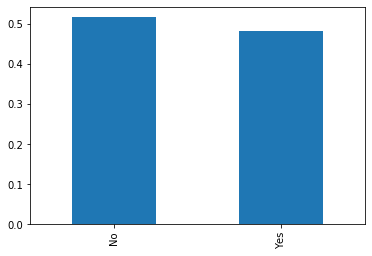

In [169]:
df.Partner.value_counts(normalize=True).plot(kind='bar');

showing partner counts more 50% not the partner

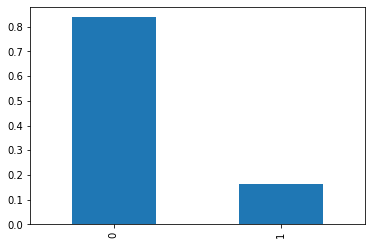

In [170]:
df.SeniorCitizen.value_counts(normalize=True).plot(kind='bar');

Senior citizens are not used the services so  it is arround 80%.

Now check the gender counts

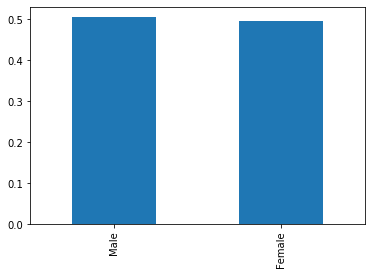

In [171]:
df.gender.value_counts(normalize=True).plot(kind='bar');

Here we can see that ratio of male and feamale are almost equal

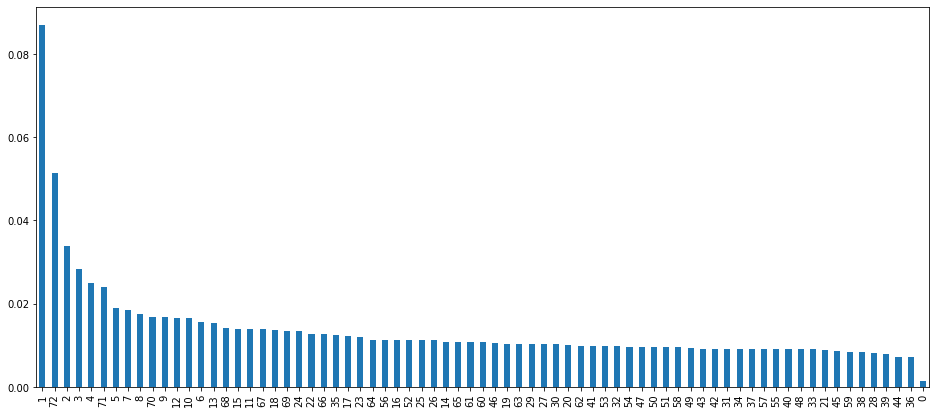

In [173]:
df.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7));

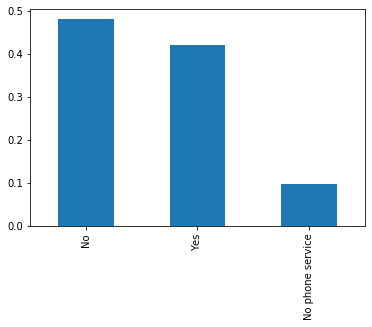

In [174]:
df.MultipleLines.value_counts(normalize=True).plot(kind='bar');

here we can see that Multiplelines graph

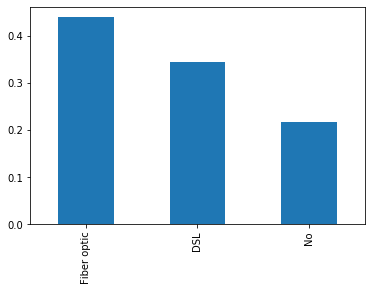

In [176]:
df.InternetService.value_counts(normalize=True).plot(kind='bar');

Now this shows Internet service we used Fibre optics so here 45% used fibre optics 35% DSL and 20% are not used the service

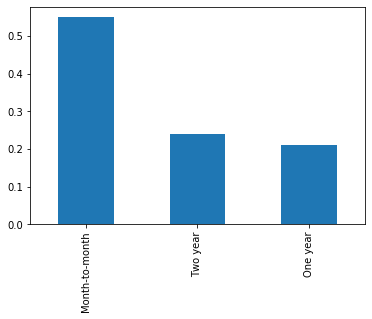

In [177]:
df.Contract.value_counts(normalize=True).plot(kind='bar');

This shows the contract of the vender to company

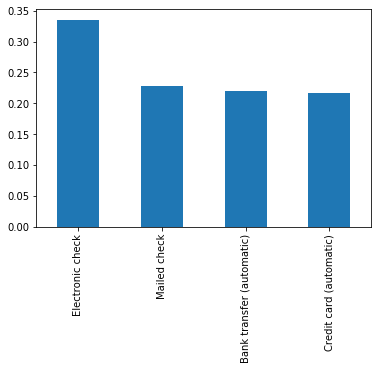

In [178]:
df.PaymentMethod.value_counts(normalize=True).plot(kind='bar');

Now here we can see that payment media 30% used Electronics check
24% used Mailed check
20% Online
26% Creditcard


Lets check relation of other variables to Target

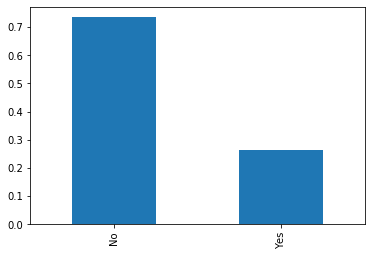

In [179]:
df.Churn.value_counts(normalize=True).plot(kind='bar');

So this shows whether the customer switch there customer that is churn Yes or No.
so according to dataset 70% chances to No and 30% Yes

In [180]:
#comparing
print('Percent of Females that left the company{0}'.format((939/1869)*100))
print('Percent of Males that left the company{0}'.format((930/1869)*100))


Percent of Females that left the company50.24077046548957
Percent of Males that left the company49.75922953451043


Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


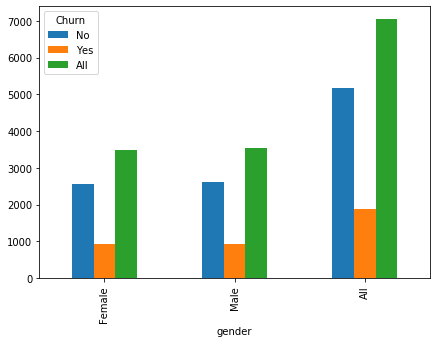

In [181]:
#Gender vs churn
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


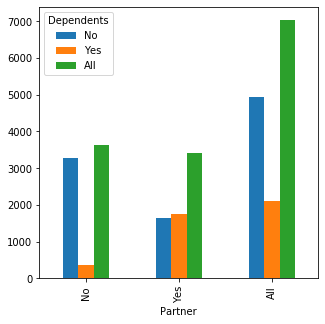

In [182]:
print(pd.crosstab(df.Partner,df.Dependents,margins=True))
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5))

Churn    No   Yes
row_0            
29.0   5174  1869


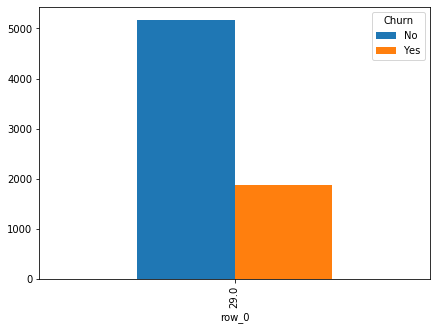

In [183]:
print(pd.crosstab(df.tenure.median(),df.Churn))
pd.crosstab(df.tenure.median(),df.Churn).plot(kind='bar',figsize=(7,5))

In [184]:
print('Percent of Partner that had Dependents{0}'.format((1749/2110)*100))
print('Percent of Non-Partnet that had Dependents{0}'.format((361/2110)*100))

Percent of Partner that had Dependents82.8909952606635
Percent of Non-Partnet that had Dependents17.10900473933649


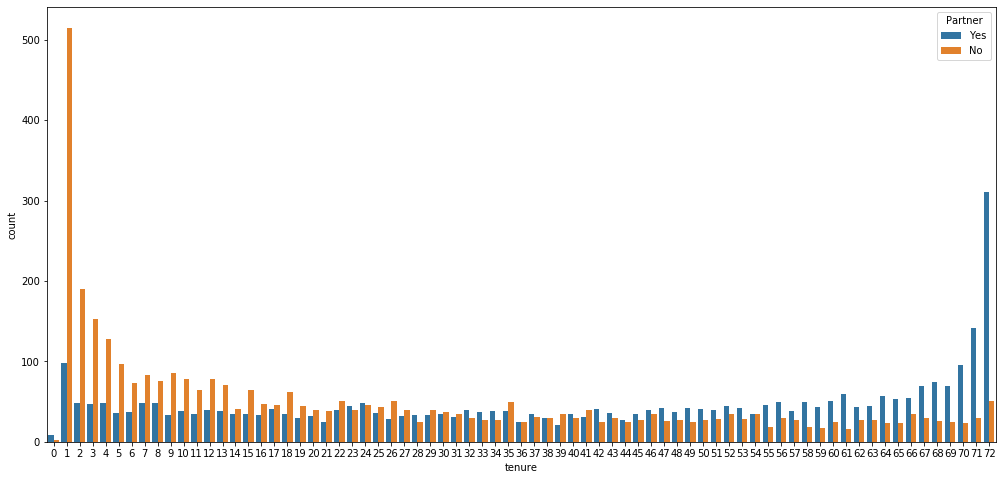

In [185]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

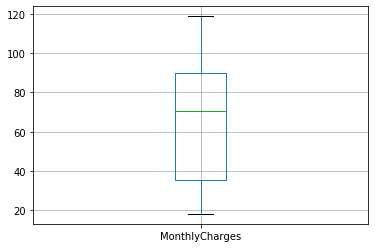

In [186]:
#Now to find outs the outliers
df.boxplot('MonthlyCharges')

In [ ]:
df.boxplot('TotalCharges');

No outliiers in the box plots

In [187]:
df.describe()#for calculating mean mode and meadian

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<function matplotlib.pyplot.show(*args, **kw)>

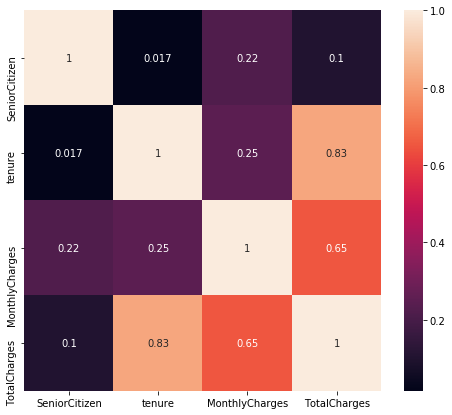

In [188]:
#for checking the correlatin between dataset
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show

So here we can see that tenure shows 83% strong while seniorcitizen showing 10%

In [ ]:
#Data Munging Process
df.isnull().sum()

In [189]:
df.loc[(df.Churn=='Yes'),'MonthlyCharges'].median()
#here we find median of churn with respect to Monthly charges

79.65

In [ ]:
df.loc[(df.Churn=='Yes'),'TotalCharges'].median()
#Churn vs Total charges

In [ ]:
df.loc[(df.Churn=='Yes'),'tenure'].median()
#churn vs tenure

In [ ]:
df.loc[(df.Churn=='Yes'),'PaperlessBilling'].value_counts(normalize=True)
#churn vs PaperlessBilling

In [ ]:
df.loc[(df.Churn=='Yes'),'DeviceProtection'].value_counts(normalize=True)
#churn vs Device Protection

In [ ]:
df.loc[(df.Churn=='Yes'),'OnlineBackup'].value_counts(normalize=True)
#Churn vs Online Backup

In [ ]:
df.loc[(df.Churn=='Yes'),'TechSupport'].value_counts(normalize=True)
#Churn vs Techsupport

In [ ]:
# data not required for our analysis that we can remove 
df.drop('gender',axis=1,inplace=True)

In [ ]:
df.head(1)

In [ ]:
df.drop(['tenure','MonthlyCharges'],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop(['SeniorCitizen','customerID','MultipleLines','Contract','PaymentMethod','TotalCharges'],axis=1,inplace=True)

In [ ]:
df.head(1)

In [ ]:
df.drop('InternetService',axis=1,inplace=True)

In [ ]:
df.head(2)

In [ ]:
#For Analysis Purpose we need to convert categorical data into numbers.
Num_val={'Yes':1,'No':0}
df['Churn']=df["Churn"].apply(lambda x:Num_val[x])
df.head(2)

In [ ]:
#appling for all 
df=pd.get_dummies(df)
df.head(2)

In [ ]:
#Defining the input variables
x=df.iloc[:,1:]
x.head()

In [ ]:
#Churn is the out variable
y=df.iloc[:,1]
y.head()

In [ ]:
#Pre-Processing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
#Applying ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#From LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

So from Logistic Regression we are getting 100% Accuracy Score

In [ ]:
#From Support Vector Classifier
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
#Applying Gaussian Classifier
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

In [ ]:
#From DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

So here we can see that from all algorithm we get 100% Accuracy score